# Extra

# The Factors

In [5]:
# Loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read without automatic date parsing to get the raw serial numbers
df_factors = pd.read_excel('data/factor_pricing_data_monthly.xlsx', sheet_name='factors (excess returns)', parse_dates=True)
df_portfolios = pd.read_excel('data/factor_pricing_data_monthly.xlsx', sheet_name='portfolios (excess returns)', parse_dates=True)

df_factors.set_index("Date", inplace=True)
df_portfolios.set_index("Date", inplace=True)

ANNUAL_FACTOR = 12

df_factors.head(2)

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0550,0.0188,0.0185,-0.0184,0.0189,0.0745
1980-02-29,-0.0123,-0.0162,0.0059,-0.0095,0.0292,0.0789


# 2.1

In [6]:
# Anualized summary stats
from math import sqrt

summary_stats = pd.DataFrame({
    'Mean': df_factors.mean() * ANNUAL_FACTOR,
    'Vol': df_factors.std() * (ANNUAL_FACTOR**0.5),
    'Sharpe': (df_factors.mean() / df_factors.std()) * sqrt(ANNUAL_FACTOR)
})

print('Total sample')
display(summary_stats)

filtered = df_factors.loc[(df_factors.index >= '2015-01-01') & (df_factors.index <= '2025-12-31')]

summary_stats = pd.DataFrame({
    'Mean': filtered.mean() * ANNUAL_FACTOR,
    'Vol': filtered.std() * (ANNUAL_FACTOR**0.5),
    'Sharpe': (filtered.mean() / filtered.std()) * sqrt(ANNUAL_FACTOR)
})

print('2015 - 2025')
display(summary_stats)


Total sample


,Mean,Vol,Sharpe
MKT,0.087552,0.156142,0.560718
SMB,0.006120,0.101274,0.060435
HML,0.026039,0.108835,0.239249
RMW,0.044047,0.082931,0.531132
CMA,0.028288,0.072480,0.390284
UMD,0.060313,0.153352,0.393299


2015 - 2025


,Mean,Vol,Sharpe
MKT,0.117872,0.157356,0.749078
SMB,-0.023775,0.103166,-0.230455
HML,-0.016303,0.129885,-0.125520
RMW,0.040012,0.072632,0.550896
CMA,-0.009141,0.082072,-0.111373
UMD,0.020119,0.137387,0.146438


# 2.2

- Does each factor have a positive risk premium (positive expected excess return)?

- How have the factors performed since the time of the case, (2015-present)?

--------------------------------

1. The all factors have a historic positive excess return as the mean is positive for each for the total sample. 

2. The 2015-2025 has some negative excess returns for some factors.





# 2.3

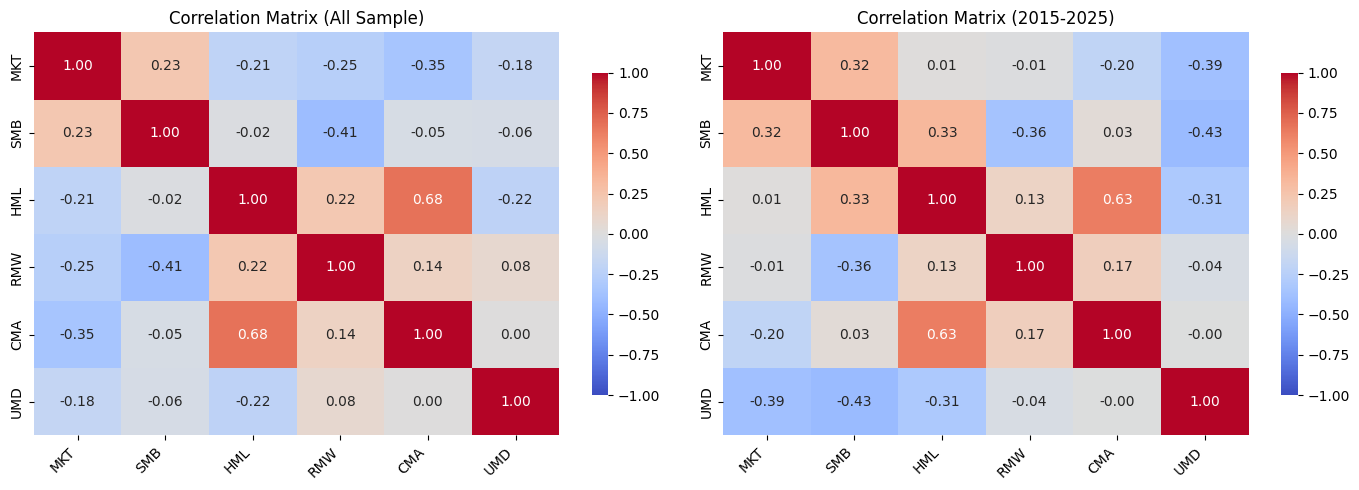

In [7]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

corr_all = df_factors.corr()
corr_2015_2025 = df_factors.loc[(df_factors.index >= '2015-01-01') & (df_factors.index <= '2025-12-31')].corr()

# Plots full
sns.heatmap(corr_all, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, 
            ax=axs[0], cbar_kws={'shrink': 0.8})
axs[0].set_title('Correlation Matrix (All Sample)')
axs[0].set_xticklabels(corr_all.columns, rotation=45, ha='right')
axs[0].set_yticklabels(corr_all.index)

# Plots 2015-2025
sns.heatmap(corr_2015_2025, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            ax=axs[1], cbar_kws={'shrink': 0.8})
axs[1].set_title('Correlation Matrix (2015-2025)')
axs[1].set_xticklabels(corr_2015_2025.columns, rotation=45, ha='right')
axs[1].set_yticklabels(corr_2015_2025.index)

plt.tight_layout()
plt.show()

In [8]:
mean_corr = corr_all.where(~np.eye(corr_all.shape[0],dtype=bool)).stack().mean()
print(mean_corr)

mean_corr = corr_2015_2025.where(~np.eye(corr_2015_2025.shape[0],dtype=bool)).stack().mean()
print(mean_corr)

-0.02715327902627014
-0.007777381057361532


- Does the construction method succeed in keeping correlations small?

- Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

------

The construction method succeeds in keeping correlations small, CMA and HML are the most correlated at 0.68. The mean correlations is low at `-0.027` for the full sample and `-0.007` for the 2015-2025 sample.

This argument is supported by HMLs high correlation with CMA as noted previously. This can also be checked by preforming a regression (idk if need this here) to see if it can be explained by other factors.

# 2.4

In [9]:
df_factors
df_factors_2015_2025 = df_factors.loc[(df_factors.index >= '2015-01-01') & (df_factors.index <= '2025-12-31')]

def tangency_weights(returns):
    X = returns[returns.columns]
    mean_returns = X.mean().values

    sigma = np.cov(X.values, rowvar=False)
    inv_sigma = np.linalg.inv(sigma)

    numer = inv_sigma @ mean_returns
    denom = np.sum(numer)

    w = numer / denom

    return w

print('Full sample')
weights = tangency_weights(df_factors)
display(df_factors.columns)
display(weights)

print('2015-2025')
weights = tangency_weights(df_factors_2015_2025)
display(df_factors_2015_2025.columns)
display(weights)

print('mean returns')
display(np.array(df_factors.mean() * ANNUAL_FACTOR))

Full sample


Index(['MKT', 'SMB', 'HML', 'RMW', 'CMA', 'UMD'], dtype='object')

array([ 0.21864963,  0.06684885, -0.02121171,  0.30182938,  0.32143088,
        0.11245297])

2015-2025


Index(['MKT', 'SMB', 'HML', 'RMW', 'CMA', 'UMD'], dtype='object')

array([ 0.40041136, -0.09003229, -0.00382591,  0.46125809,  0.00710228,
        0.22508647])

mean returns


array([0.08755182, 0.00612044, 0.02603869, 0.04404745, 0.02828759,
       0.06031314])

- Which factors seem most important? And Least?

- Are the factors with low mean returns still useful?

------

For both time samples, MKR and RMW have the highest tangency weights. CMA is also high but not as prevalent in the 2015-2025 sample, replaced by UMD. SMB and unsurprisingly HML have the lowest tangency weights.

The low mean factors are still useful as they can serve the role of diversifiers or by cutting portfolio variance to boost Sharpe. 

In [10]:
df_truncated = df_factors.loc[:, ['MKT', 'SMB', 'HML', 'UMD']]

weights_truncated = tangency_weights(df_truncated)
display(df_truncated.columns)
display(weights_truncated)


Index(['MKT', 'SMB', 'HML', 'UMD'], dtype='object')

array([ 0.37651386, -0.05119794,  0.3653206 ,  0.30936347])

- Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

- What do you conclude about the importance or unimportance of these styles?

------

SMB is negative with the rest of the factors having equal positive weights. 

The two important factors are value and momentum as well as the broader market. Size is not as important as in the full sample. 

# Testing modern LPMs

In [11]:
# Data
df_portfolios.head()

# Factor models:

CAPM = np.array(['MKT'])
FF3 = np.array(['MKT', 'SMB', 'HML'])
FF5 = np.array(['MKT', 'SMB', 'HML', 'RMW', 'CMA'])
AQR = np.array(['MKT', 'HML', 'RMW', 'UMD'])


AQR


array(['MKT', 'HML', 'RMW', 'UMD'], dtype='<U3')

# 3.1

In [12]:
import statsmodels.api as sm

def lpm_test(df_portfolios, df_factors, factor_cols):

    # Z = df_portfolios.join(df_factors[factor_cols])
    Z = df_portfolios.join(df_factors[factor_cols], how = 'inner')

    F = sm.add_constant(Z[factor_cols])

    result = []

    for name in df_portfolios.columns:
        Y = Z[name]
        model = sm.OLS(Y, F.loc[Y.index])

        fit = model.fit()

        alpha = fit.params['const']
        r2 = fit.rsquared

        result.append({
            'portfolio': name, 
            'alpha': alpha * ANNUAL_FACTOR, 
            'r2': r2})

    out = pd.DataFrame(result).set_index('portfolio')
    return out

aqr_test = lpm_test(df_portfolios, df_factors, AQR)

print('sample')
display(aqr_test.head(10))

print('sorted by r2')
display(aqr_test.sort_values(by='r2', ascending=False).head(10))

print('sorted by alpha')
display(aqr_test.sort_values(by='alpha', ascending=False).head(10))

sample


,alpha,r2
portfolio,,
Agric,0.011651,0.342074
Food,0.001500,0.455064
Soda,0.015381,0.302544
Beer,0.009853,0.414773
Smoke,0.041110,0.265363
Toys,-0.033704,0.510213
Fun,0.039065,0.607213
Books,-0.036705,0.688933
Hshld,-0.012743,0.554712


sorted by r2


,alpha,r2
portfolio,,
BusSv,-0.008147,0.846292
Fin,0.019688,0.812880
Banks,-0.021073,0.774023
Mach,-0.005260,0.753968
BldMt,-0.028632,0.752532
Whlsl,-0.016573,0.752266
Chips,0.063561,0.749845
Chems,-0.035135,0.745226
Softw,0.068373,0.744967


sorted by alpha


,alpha,r2
portfolio,,
Softw,0.068373,0.744967
Chips,0.063561,0.749845
Hardw,0.041957,0.666921
Smoke,0.041110,0.265363
Fun,0.039065,0.607213
Drugs,0.025647,0.489382
Rtail,0.021055,0.686561
LabEq,0.020087,0.727942
Fin,0.019688,0.812880


can expand list above if necessary

# 3.2

In [18]:
def mean_absolute_error(df_portfolios, df_factors, factor_cols):
    aqr_test = lpm_test(df_portfolios, df_factors, factor_cols)
    return aqr_test['alpha'].abs().mean()

aqr_MAE = mean_absolute_error(df_portfolios, df_factors, AQR)
aqr_MAE

np.float64(0.024610849041637774)

- If the pricing model worked, should these alpha estimates be large or small? Why?

- Based on your MAE stat, does this seem to support the pricing model or not?

------

If the pricing model worked the alpha estimates should be close to zero. This should happen if a correctly specificed factor model's expected returns can be fully explained by factor exposures.

The MAE is 0.02 per year. This is close to zero and supports the pricing model. (maybe??)



# 3.2 (again?)

In [21]:

summary_stats = pd.DataFrame({
    'AQR': [mean_absolute_error(df_portfolios, df_factors, AQR)],
    'CAPM': [mean_absolute_error(df_portfolios, df_factors, CAPM)],
    'FF3': [mean_absolute_error(df_portfolios, df_factors, FF3)],
    'FF5': [mean_absolute_error(df_portfolios, df_factors, FF5)]
}, index=["MAE"])

summary_stats

,AQR,CAPM,FF3,FF5
MAE,0.024611,0.02097,0.024358,0.031372


- Report the MAE statistic for each of these models and compare it with the AQR Model MAE.

- Which model fits best?

-------

In theory a lower MAE is better as is shows how well the model fits the data. CAPM seems to fit the best and AQR is on par with FF3 and better than FF5.

From the data above CAPM has the lowest MAE and therefore fits best.

# 3.3

- Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

------

Based on the data above, all factors seem important for pricing. An addition of a factor to a model seems to add estimation noise but does not improve the model with none of the factors having a significantly negative effect.

From the data above inclusion of UMD would not significantly improve the model as evident by its inclusion in the AQR model.

# 3.4

In [24]:
def r2_stats(df_portfolios, df_factors, factor_cols):
    aqr_test = lpm_test(df_portfolios, df_factors, factor_cols)
    return aqr_test['r2'].mean()

r2_stats = pd.DataFrame({
    'AQR': [r2_stats(df_portfolios, df_factors, AQR)],
    'CAPM': [r2_stats(df_portfolios, df_factors, CAPM)],
    'FF3': [r2_stats(df_portfolios, df_factors, FF3)],
    'FF5': [r2_stats(df_portfolios, df_factors, FF5)]
}, index=["r2"])

r2_stats

,AQR,CAPM,FF3,FF5
r2,0.571935,0.522622,0.567874,0.591768


- Do this for each of the three models you tested.

- Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

--------

Yes, all models have high time-series r-squared stats which implies that more return variance is captured by the factors. These factors would indeed by good in an LFD since a high r-squared allows for good decomposition/attribution results.

# 3.5

- Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4

- Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

-------

asd